In [100]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





Initialisation du jeu de donnée iris en 2 dataframe , le premier non etiqueté nous servira a entrainer le modele et le deuxieme etiqueté nous servira a tester notre modele.

In [101]:

iris = load_iris()

X = iris.data   
y = iris.target     

df_non_etiquete = pd.DataFrame(X, columns=iris.feature_names)
df_etiquete = pd.DataFrame(X, columns=iris.feature_names)
df_etiquete['target'] = iris.target
df_etiquete['target_name'] = df_etiquete['target'].map({i: name for i, name in enumerate(iris.target_names)})


calcul de k avec la methode du coude et evaluation de la qualité des cluster avec le silhouette score 

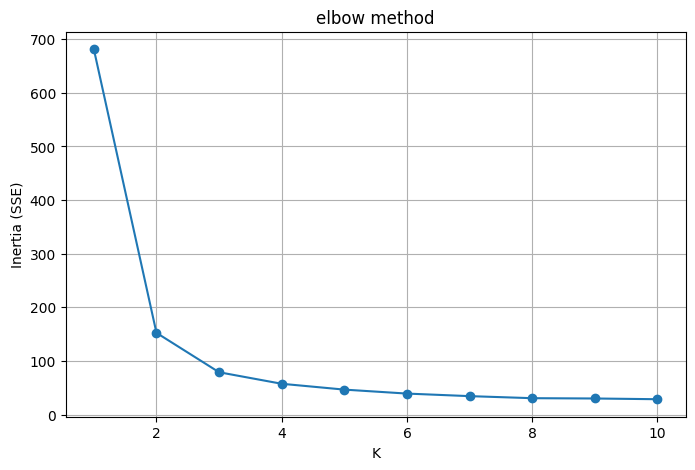

In [102]:
inertias = []

# Tester de K = 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("elbow method")
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

L'inertie est la somme des distances au carré entre chaque point et le centroïde de son cluster. Plus l'inertie est élevé et plus les points seront eloignés les uns des autres . Plus le nombre k augmente et moins l'inertie diminue . Il faut donc prendre le k quand la diminution devient minime. **En l'occurence soit 2 , soit 3 .**

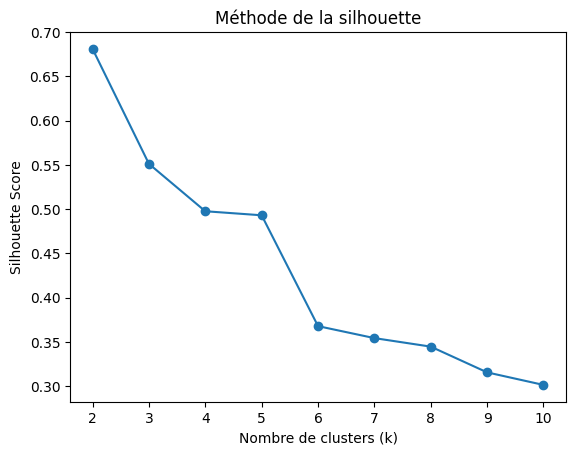

In [103]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette")
plt.show()

Pour nous aider un peu plus , le **silhouette score** est un score qui nous montre la qualité d'un cluster . Plus le score est proche de 1 , mieux c'est . En l'occurrence k=2 est mieux . 

Néanmois , en regardant les données etiqueté on voit que le k means n'est peut etre pas le meilleur algorithme pour ce genre de dataset car on voit que certaines lignes de 2 catégories s'entre-croisent .  



entrainement du modèle

In [104]:
kmeans = KMeans(n_clusters= 3, random_state=42)  # n_clusters = nombre de clusters 
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

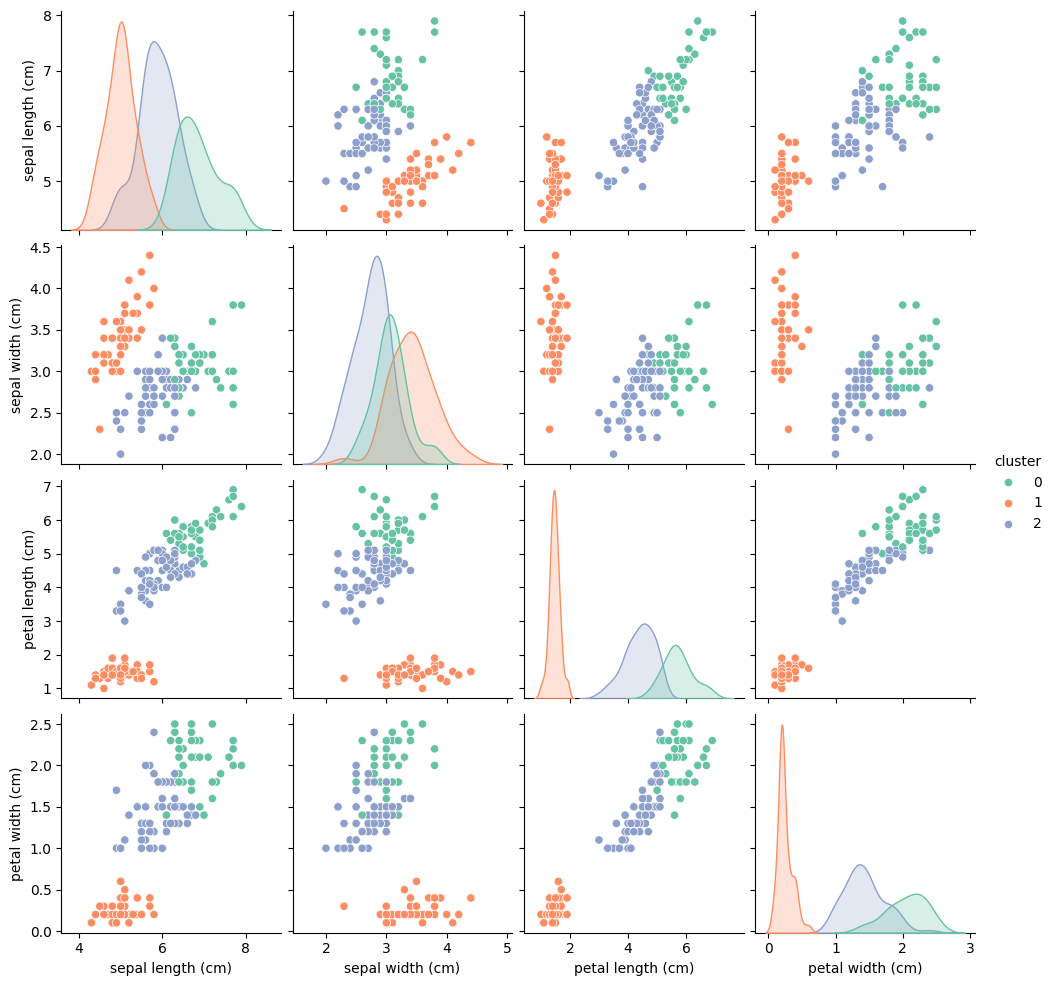

In [105]:
# création de la variable labels qui correspond a chaque point
labels = kmeans.labels_

# ajout de la colonne cluster dans le dataset non étiqueté pour voir a quel groupe appartiennent les fleurs 
df_non_etiquete = pd.DataFrame(X, columns=iris.feature_names)
df_non_etiquete['cluster'] = labels

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df_non_etiquete, hue='cluster', palette='Set2')
plt.show()

vérification des écart avec le dataset etiqueté

In [106]:
conf = confusion_matrix(df_etiquete['target'], df_non_etiquete['cluster'])
row_ind, col_ind = linear_sum_assignment(-conf)  # maximise l'appariement

# Créer un mapping du cluster au vrai label
mapping = {cluster_label: true_label for cluster_label, true_label in zip(col_ind, row_ind)}

# Appliquer le mapping
df_non_etiquete['cluster_mapped'] = df_non_etiquete['cluster'].map(mapping)

# Comparer maintenant avec les vraies cibles
df_compare = df_etiquete.copy()
df_compare['cluster'] = df_non_etiquete['cluster_mapped']

ecart = df_compare[df_compare['target'] != df_compare['cluster']]

ecart.to_csv('data\\raw\\ecart_kmeans_sklearn.csv', index=False)
print("Un fichier csv a été créé avec les données qui ne correspondent pas aux clusters dans Data\\raw.")



Un fichier csv a été créé avec les données qui ne correspondent pas aux clusters dans Data\raw.
